In [9]:
from crunchy_snow.application import download_data, apply_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set up arguments 
aoi = {'minlon':-104.6450, 'minlat':40.5002, 'maxlon':-105.5754, 'maxlat':40.3092}
target_date = '20240320'
snowoff_date = '20230910'
out_dir = '../../data/application'
model_path = '../../weights/quinn_ResDepth_v3'

In [3]:
download_data(aoi=aoi, target_date=target_date, snowoff_date=snowoff_date, out_dir=out_dir)

searching for Sentinel-1 snow-on data
Returned 5 acquisitions


/srv/conda/envs/notebook/lib/python3.11/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


searching for Sentinel-1 snow-off data
Returned 5 acquisitions
searching for Sentinel-2 snow-on data
Returned 5 acquisitions
searching for COP30 dem data
downloading fractional forest cover data
combining datasets
writing input data
done!


In [4]:
ds = apply_model(out_dir=out_dir, model_path=model_path)

reading input data
loading model


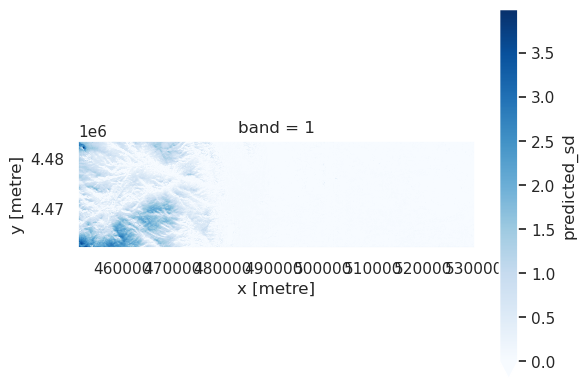

In [11]:
sns.set_theme()
f, ax = plt.subplots()
ds.predicted_sd.plot(ax=ax, cmap='Blues', vmin=0)
ax.set_aspect('equal')
ax.set_title('predicted snow depth')